In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest


In [3]:
df = pd.read_csv("D:\\Mia town\\IT\\Data\\INDIEZ\\data_interview.csv")

In [4]:
# Checking Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798332 entries, 0 to 798331
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   STT            798332 non-null  int64  
 1   date_time      798332 non-null  object 
 2   event_name     798332 non-null  object 
 3   level          798332 non-null  int64  
 4   user           798332 non-null  object 
 5   day_diff       798332 non-null  int64  
 6   day0           798332 non-null  object 
 7   mode_game      798332 non-null  object 
 8   win            243697 non-null  float64
 9   reason_to_die  117413 non-null  object 
 10  quantity       798332 non-null  int64  
 11  version        798332 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 73.1+ MB


In [5]:
df.head()

,STT,date_time,event_name,level,user,day_diff,day0,mode_game,win,reason_to_die,quantity,version
0,40,10/28/2023,game_start,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0,10/28/2023,normal,NaN,NaN,0,1.6.0
1,41,10/28/2023,game_start,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0,10/28/2023,normal,NaN,NaN,0,1.6.0
2,42,10/28/2023,game_start,2,1cffd052-4616-4d29-bfd5-950e23b763d4,0,10/28/2023,normal,NaN,NaN,0,1.6.0
3,43,10/28/2023,game_start,3,1cffd052-4616-4d29-bfd5-950e23b763d4,0,10/28/2023,normal,NaN,NaN,0,1.6.0
4,44,10/28/2023,game_start,4,1cffd052-4616-4d29-bfd5-950e23b763d4,0,10/28/2023,normal,NaN,NaN,0,1.6.0


In [6]:
#Cleaning data (NaN, wrong dtype,...)
df['date_time'] = df['date_time'].astype('datetime64[ns]')
df['day0'] = df['day0'].astype('datetime64[ns]')
df['win'] = df['win'].fillna(0)
df['reason_to_die'] = df['reason_to_die'].fillna(0)

In [7]:
# Display the duplicate rows
duplicates = df.duplicated()
duplicate_rows = df[duplicates]
print(duplicate_rows)

Empty DataFrame
Columns: [STT, date_time, event_name, level, user, day_diff, day0, mode_game, win, reason_to_die, quantity, version]
Index: []


In [8]:
# Check null data
df.isnull().sum()

STT              0
date_time        0
event_name       0
level            0
user             0
day_diff         0
day0             0
mode_game        0
win              0
reason_to_die    0
quantity         0
version          0
dtype: int64

In [9]:
# filter user per version
dau_1_5_2 = df.loc[df['version'] == '1.5.2']
dau_1_6_0 = df.loc[df['version'] == '1.6.0']
# Count all user per version
dau_1_6_0 = dau_1_6_0.groupby('date_time')['user'].nunique().reset_index(name='dau_1_6_0')
dau_1_5_2 = dau_1_5_2.groupby('date_time')['user'].nunique().reset_index(name='dau_1_5_2')

# Create table for comparison
dau_comparison = pd.merge(dau_1_5_2, dau_1_6_0, on='date_time')
dau_comparison['percent_change'] = ((dau_comparison['dau_1_6_0'] - dau_comparison['dau_1_5_2'])/dau_comparison['dau_1_5_2'] )* 100

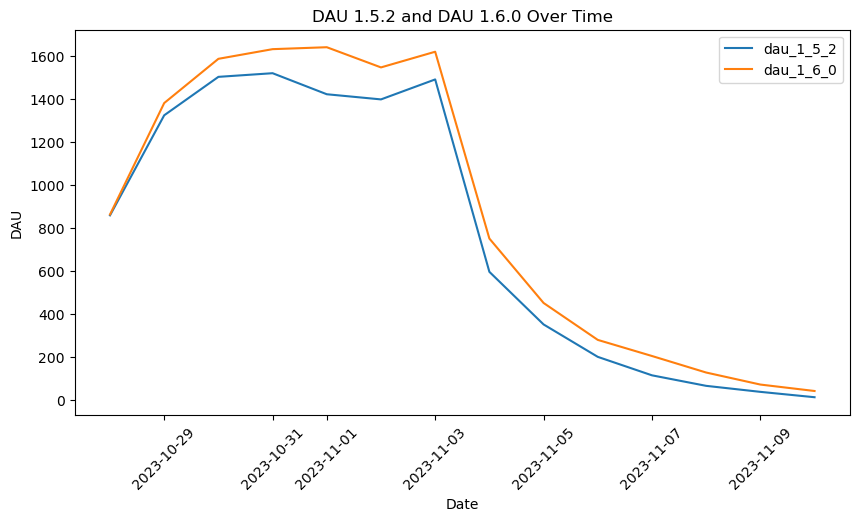

In [10]:
#plotting
fig, ax = plt.subplots(figsize = (10,5))

plt.plot(dau_comparison['date_time'], dau_comparison['dau_1_5_2'], label = 'dau_1_5_2')
plt.plot(dau_comparison['date_time'], dau_comparison['dau_1_6_0'], label = 'dau_1_6_0')

# Add labels and title
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.ylabel('DAU')
plt.title('DAU 1.5.2 and DAU 1.6.0 Over Time')
plt.legend()
plt.show()

+ so nguoi choi hoan thanh tutorial 


In [11]:
# Total players complete the Tut
check = df.loc[(df['event_name'] == 'tutorial') & (df['quantity'] == -2)]

In [12]:
check.groupby('version')['quantity'].count()

version
1.5.2    6497
1.6.0    6712
Name: quantity, dtype: int64

In [13]:
tutorial = df.loc[df['event_name'] == 'tutorial']

In [14]:
tutorial.head()

,STT,date_time,event_name,level,user,day_diff,day0,mode_game,win,reason_to_die,quantity,version
16,147,2023-10-28,tutorial,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0,2023-10-28,tutorial,0.0,0,-1,1.6.0
17,148,2023-10-28,tutorial,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0,2023-10-28,tutorial,0.0,0,1,1.6.0
18,149,2023-10-28,tutorial,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0,2023-10-28,tutorial,0.0,0,2,1.6.0
19,150,2023-10-28,tutorial,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0,2023-10-28,tutorial,0.0,0,3,1.6.0
20,151,2023-10-28,tutorial,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0,2023-10-28,tutorial,0.0,0,4,1.6.0


In [15]:
# tinh tong so nguoi skip tutorial va bat dau choi tutorial
# total_user = tutorial.loc[(tutorial['quantity'] == 0) | (tutorial['quantity'] == -1)]
# total_user.groupby('version')['quantity'].count().reset_index()

In [16]:
user_tut_1_5_2 = tutorial.loc[tutorial['version'] == '1.5.2'] 
user_tut_1_5_2 = user_tut_1_5_2.groupby('quantity')['quantity'].count().reset_index(name='qty')
user_tut_1_5_2 = user_tut_1_5_2.iloc[1:,:]
user_tut_1_5_2 = user_tut_1_5_2[user_tut_1_5_2['quantity'] !=0]
total_user_1_5_2 = user_tut_1_5_2['qty'][1]
user_tut_1_5_2['percent_complete'] = user_tut_1_5_2['qty']/total_user_1_5_2*100
print('VERSION 1.5.2')
user_tut_1_5_2

VERSION 1.5.2


,quantity,qty,percent_complete
1,-1,6988,100.000000
3,1,6658,95.277619
4,2,6573,94.061248
5,3,6535,93.517459
6,4,6508,93.131082


In [17]:
user_tut_1_6_0 = tutorial.loc[tutorial['version'] == '1.6.0'] 
user_tut_1_6_0 = user_tut_1_6_0.groupby('quantity')['quantity'].count().reset_index(name='qty')
user_tut_1_6_0 = user_tut_1_6_0.iloc[1:,:]
user_tut_1_6_0 = user_tut_1_6_0[user_tut_1_6_0['quantity'] !=0]
total_user_1_6_0 = user_tut_1_6_0['qty'][1]
user_tut_1_6_0['percent_complete'] = user_tut_1_6_0['qty']/total_user_1_6_0*100
print('VERSION 1.6.0')
user_tut_1_6_0

VERSION 1.6.0


,quantity,qty,percent_complete
1,-1,7224,100.000000
3,1,6885,95.307309
4,2,6811,94.282946
5,3,6782,93.881506
6,4,6759,93.563123
7,5,6749,93.424695
8,6,6736,93.244740
9,7,6726,93.106312
10,8,6713,92.926357


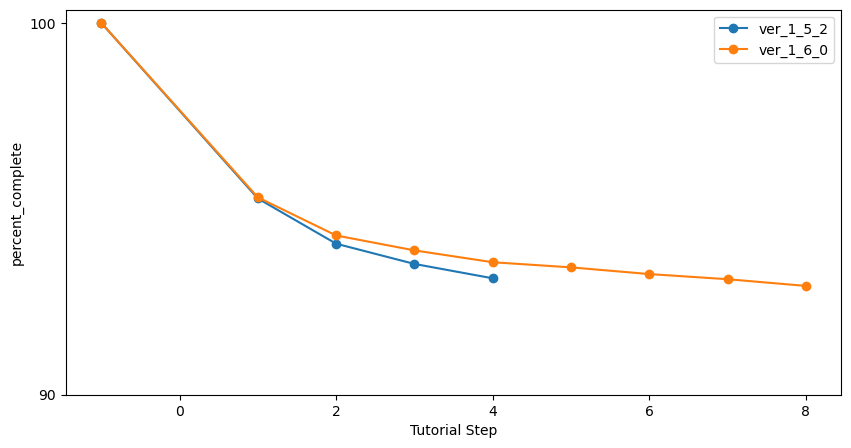

In [18]:
#plotting
fig, ax = plt.subplots(figsize = (10,5))

plt.plot(user_tut_1_5_2['quantity'], user_tut_1_5_2['percent_complete'], marker = 'o', label = 'ver_1_5_2')
plt.plot(user_tut_1_6_0['quantity'], user_tut_1_6_0['percent_complete'], marker = 'o', label = 'ver_1_6_0')

# Add labels and title
plt.xlabel('Tutorial Step')
plt.ylabel('percent_complete')
# plt.title('DAU 1.5.2 and DAU 1.6.0 Over Time')
plt.yticks([90, 100], ['90', '100'])
plt.legend()
plt.show()

In [19]:
df.head()

,STT,date_time,event_name,level,user,day_diff,day0,mode_game,win,reason_to_die,quantity,version
0,40,2023-10-28,game_start,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0,2023-10-28,normal,0.0,0,0,1.6.0
1,41,2023-10-28,game_start,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0,2023-10-28,normal,0.0,0,0,1.6.0
2,42,2023-10-28,game_start,2,1cffd052-4616-4d29-bfd5-950e23b763d4,0,2023-10-28,normal,0.0,0,0,1.6.0
3,43,2023-10-28,game_start,3,1cffd052-4616-4d29-bfd5-950e23b763d4,0,2023-10-28,normal,0.0,0,0,1.6.0
4,44,2023-10-28,game_start,4,1cffd052-4616-4d29-bfd5-950e23b763d4,0,2023-10-28,normal,0.0,0,0,1.6.0


In [20]:
# Tính retention rate:
def cal_retention_rate(df_by_version, days):    # df_by_version: use for each version 1.5.2/1.6.0
    init_user = df_by_version['user'].nunique()
    retained_user = df_by_version.loc[df_by_version['day_diff'] == days]['user'].nunique()
    retention_rate = retained_user/init_user
    return retention_rate, init_user, retained_user

# Date by version
ver_1_5_2 = df.loc[df['version'] == '1.5.2']
ver_1_6_0 = df.loc[df['version'] == '1.6.0']

# Calculation
rr_1_5_2_day1, iu_1_5_2_day1, ru_1_5_2_day1 = cal_retention_rate(ver_1_5_2,1)
rr_1_5_2_day7, iu_1_5_2_day7, ru_1_5_2_day7 = cal_retention_rate(ver_1_5_2,7)
rr_1_6_0_day1, iu_1_6_0_day1, ru_1_6_0_day1 = cal_retention_rate(ver_1_6_0,1)
rr_1_6_0_day7, iu_1_6_0_day7, ru_1_6_0_day7 = cal_retention_rate(ver_1_6_0,7)

# Printing
print('VERSION 1.5.2')
print('day1')
print('Retention Rate:', rr_1_5_2_day1)
print('Initial User:', iu_1_5_2_day1)
print('Retained User:', ru_1_5_2_day1)
print('-----------')
print('day7')
print('Retention Rate:',rr_1_5_2_day7)
print('Initial Use:r', iu_1_5_2_day7)
print('Retained User:', ru_1_5_2_day7)
print('=========================')
print('VERSION 1.6.0')
print('day1')
print('Retention Rate:', rr_1_6_0_day1)
print('Initial User:', iu_1_6_0_day1)
print('Retained User:', ru_1_6_0_day1)
print('-----------')
print('day7')
print('Retention Rate:', rr_1_6_0_day7)
print('Initial User:', iu_1_6_0_day7)
print('Retained User:', ru_1_6_0_day7)



VERSION 1.5.2
day1
Retention Rate: 0.2668265627342227
Initial User: 6671
Retained User: 1780
-----------
day7
Retention Rate: 0.02743216909009144
Initial Use:r 6671
Retained User: 183
VERSION 1.6.0
day1
Retention Rate: 0.2858998412469332
Initial User: 6929
Retained User: 1981
-----------
day7
Retention Rate: 0.0417087602828691
Initial User: 6929
Retained User: 289


In [21]:
# Create array for the Z test (RR day 1)
counts_day1 = [ru_1_5_2_day1, ru_1_6_0_day1]
nobs_day1 = [iu_1_5_2_day1, iu_1_6_0_day1]

# Peform the Z test
z_stat_day1, p_value_day1 = proportions_ztest(counts_day1, nobs_day1)

# Output
print('Z test RR day 1')
print(f'Zstat : {z_stat_day1}')
print(f'pvalue : {p_value_day1}')

counts_day7 = [ru_1_5_2_day7, ru_1_6_0_day7]
nobs_day7 = [iu_1_5_2_day7, iu_1_6_0_day7]

# Peform the Z test
z_stat_day7, p_value_day7 = proportions_ztest(counts_day7, nobs_day7)

# Output
print('Z test RR day 7')
print(f'Zstat : {z_stat_day7}')
print(f'pvalue : {p_value_day7}')


Z test RR day 1
Zstat : -2.485984455187577
pvalue : 0.012919360874932801
Z test RR day 7
Zstat : -4.54730878112399
pvalue : 5.433624995471488e-06


Problem 3

In [22]:
impression_a = 50000
click_a = 2000
install_a = 500
cost_a = 2000

impression_b = 50000
click_b = 3000
install_b = 600
cost_b = 2000

In [26]:
# Calculating
ctr_a = (click_a/impression_a)*100
cr_a = (install_a/click_a)*100
cpi_a = (cost_a/install_a)

ctr_b = (click_b/impression_b)*100
cr_b = (install_b/click_b)*100
cpi_b = (cost_b/install_b)

#Printing
print('Creative A')
print('CTR', ctr_a)
print('CR', cr_a)
print('CPI', cpi_a)
print('=================')
print('Creative B')
print('CTR', ctr_b)
print('CR', cr_b)
print('CPI', cpi_b)

Creative A
CTR 4.0
CR 25.0
CPI 4.0
Creative B
CTR 6.0
CR 20.0
CPI 3.3333333333333335


In [25]:
# Create array for the Z test Between Conversion Rate and two creatives
counts = [500,600]
nobs = [2000,3000]

# Peform the Z test
z_stat, p_value = proportions_ztest(counts, nobs)

# Output
print(f'Zstat : {z_stat}')
print(f'pvalue : {p_value}')


Zstat : 4.181210050035453
pvalue : 2.8996184057874934e-05
